<a href="https://colab.research.google.com/github/weireagan/reaganpython/blob/master/transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%tensorflow_version 2.x

In [0]:
import matplotlib.pyplot as plt
import numpy as np
# Layers for FNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
# Layers for CNN
from tensorflow.keras.layers import Conv2D, MaxPool2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
# Data Preprocessing
from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical


載入資料集(cifar10)

In [0]:
(x_train, y_train0), (x_test, y_test0) = datasets.cifar10.load_data()

In [0]:
name_list = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


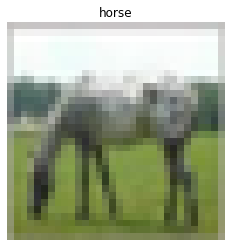

In [5]:
idx = np.random.randint(x_train.shape[0])
x_sample = x_train[idx]
y_sample = y_train0[idx].squeeze()

plt.imshow(x_sample)
plt.title(name_list[y_sample])
plt.axis('off');

In [0]:
x_train = x_train / x_train.max()
x_test = x_test / x_test.max()

y_train = to_categorical(y_train0, 10)
y_test = to_categorical(y_test0, 10)

In [0]:
CF_CNN_layers_10 = [Conv2D(16, (3, 3), input_shape=(16, 32, 3), padding='same', activation='relu'),
           MaxPool2D(),
           Conv2D(32, (3, 3), padding='same', activation='relu'),
           MaxPool2D(),
           Conv2D(64, (3, 3), padding='same', activation='relu'),
           GlobalAveragePooling2D()]
 

In [0]:
FC_layers = [Dense(units=256, activation='relu'),
       Dense(units=10, activation='softmax')]

In [52]:
model = Sequential(CF_CNN_layers_10+FC_layers)
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 16, 32, 16)        448       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 8, 16, 16)         0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 8, 16, 32)         4640      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 4, 8, 32)          0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 4, 8, 64)          18496     
_________________________________________________________________
global_average_pooling2d_4 ( (None, 64)                0         
_________________________________________________________________
dense_22 (Dense)             (None, 256)              

修改部分: 將optimizer改用ADAM，並將learning rate設定為0.04。

再將batch_size下修至128，訓練10次。

In [0]:
model.compile(loss='categorical_crossentropy', 
              optimizer=Adam(lr=0.05),
              metrics=['categorical_accuracy'])

In [54]:
model.fit(x_train, y_train, batch_size=128, epochs=10,validation_data=(x_test, y_test))

Epoch 1/10
391/391 [==============================] - 4s 11ms/step - loss: 2.4307 - categorical_accuracy: 0.1029 - val_loss: 2.3056 - val_categorical_accuracy: 0.1000
Epoch 2/10
391/391 [==============================] - 4s 10ms/step - loss: 2.3056 - categorical_accuracy: 0.1001 - val_loss: 2.3058 - val_categorical_accuracy: 0.1000
Epoch 3/10
391/391 [==============================] - 4s 10ms/step - loss: 2.3059 - categorical_accuracy: 0.1007 - val_loss: 2.3054 - val_categorical_accuracy: 0.1000
Epoch 4/10
391/391 [==============================] - 4s 10ms/step - loss: 2.3056 - categorical_accuracy: 0.1022 - val_loss: 2.3049 - val_categorical_accuracy: 0.1000
Epoch 5/10
391/391 [==============================] - 4s 10ms/step - loss: 2.3060 - categorical_accuracy: 0.0985 - val_loss: 2.3040 - val_categorical_accuracy: 0.1000
Epoch 6/10
391/391 [==============================] - 4s 10ms/step - loss: 2.3061 - categorical_accuracy: 0.0999 - val_loss: 2.3049 - val_categorical_accuracy: 0.100

建立B資料集 - CIFAR100的神經網路架構
和A資料集借用卷積層的權重，新增CIFAR100自己的全連接層。 修改項目: 隱藏層增至3層，神經元分別修改為128, 128, 512。

In [0]:
# 讀取資料
(U_train, v_train0), (U_test, v_test0) = datasets.cifar100.load_data()

# 將資料標準化
U_train = U_train / U_train.max()
U_test = U_test / U_test.max()

# One-hot encoding
v_train = to_categorical(v_train0, 100)
v_test = to_categorical(v_test0, 100)

In [0]:
FC_layers_CF100 = [Dense(units=128, activation='relu'),
                   Dense(units=128, activation='relu'),
                   Dense(units=512, activation='relu'),
                   Dense(units=100, activation='softmax')]

In [46]:
new_model = Sequential(CF_CNN_layers_10+FC_layers_CF100)
new_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 64, 32, 64)        1792      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 32, 16, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 32, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 8, 64)         0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 16, 8, 128)        73856     
_________________________________________________________________
global_average_pooling2d_3 ( (None, 128)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 128)              

In [0]:
for layer in CF_CNN_layers_10:
    layer.trainable = False

In [48]:
new_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 64, 32, 64)        1792      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 32, 16, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 32, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 8, 64)         0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 16, 8, 128)        73856     
_________________________________________________________________
global_average_pooling2d_3 ( (None, 128)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 128)              

In [49]:
new_model.compile(loss='categorical_crossentropy', 
                    optimizer=Adam(lr=0.04),
                    metrics=['categorical_accuracy'])
new_model.fit(U_train, v_train,
                batch_size=150, 
                epochs=10,
                validation_data=(U_test, v_test)
                )

Epoch 1/10
334/334 [==============================] - 4s 13ms/step - loss: 4.6144 - categorical_accuracy: 0.0095 - val_loss: 4.6112 - val_categorical_accuracy: 0.0100
Epoch 2/10
334/334 [==============================] - 4s 12ms/step - loss: 4.6141 - categorical_accuracy: 0.0093 - val_loss: 4.6130 - val_categorical_accuracy: 0.0100
Epoch 3/10
334/334 [==============================] - 4s 11ms/step - loss: 4.6139 - categorical_accuracy: 0.0090 - val_loss: 4.6141 - val_categorical_accuracy: 0.0100
Epoch 4/10
334/334 [==============================] - 4s 12ms/step - loss: 4.6141 - categorical_accuracy: 0.0104 - val_loss: 4.6118 - val_categorical_accuracy: 0.0100
Epoch 5/10
334/334 [==============================] - 4s 12ms/step - loss: 4.6140 - categorical_accuracy: 0.0102 - val_loss: 4.6132 - val_categorical_accuracy: 0.0100
Epoch 6/10
334/334 [==============================] - 4s 11ms/step - loss: 4.6143 - categorical_accuracy: 0.0096 - val_loss: 4.6135 - val_categorical_accuracy: 0.010

In [36]:
result = model.predict_classes(U_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [0]:
def my_predict(n): 
    print('New Model的預測是：', name_list[result[n]])
    X = U_test[n].reshape(32,32,3)
    plt.imshow(X)

New Model的預測是： bird


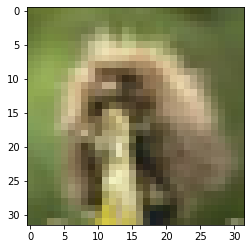

In [55]:
my_predict(5055)

In [0]:
##預測的結果很差 